In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import numpy as np

In [ ]:
pd.set_option('display.max_columns', None)
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 5)

In [ ]:
df = pd.read_excel('Canada.xlsx',sheet_name='Canada by Citizenship',skiprows=20,skipfooter=2)
df.head()

## clean data for visualization

In [ ]:
cols = df.columns.tolist()
print(cols)

In [ ]:
cols_to_drop = ['Type', 'Coverage', 'AREA', 'REG', 'DEV', 'DevName',]
df.drop(cols_to_drop, axis=1, inplace=True)
df.head(5)

In [ ]:
# rename
df.rename(columns={
    'OdName': 'Country',
    'AreaName': 'Continent',
    'RegName': 'Region',
}, inplace=True)
df.head()

In [ ]:
# since every country is unique we can make it an index col
df.set_index('Country', inplace=True)
df.head()

In [ ]:
df.loc['Afghanistan',range(1980,2014)].sum()

In [ ]:
df.loc['China',range(1980,2014)].sum()

In [ ]:
df['total'] = df.sum(axis=1)

In [ ]:
df.head()

In [28]:
df.sort_values(by='total', inplace=True)
df.head()

,Continent,Region,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,total
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Palau,Oceania,Micronesia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
Marshall Islands,Oceania,Micronesia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,2
Western Sahara,Africa,Northern Africa,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2
San Marino,Europe,Southern Europe,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,5
New Caledonia,Oceania,Melanesia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,2,5


# visualization chart
- Line plot
- Area chart
- pie chart
- scatter plot
- histogram
- world map

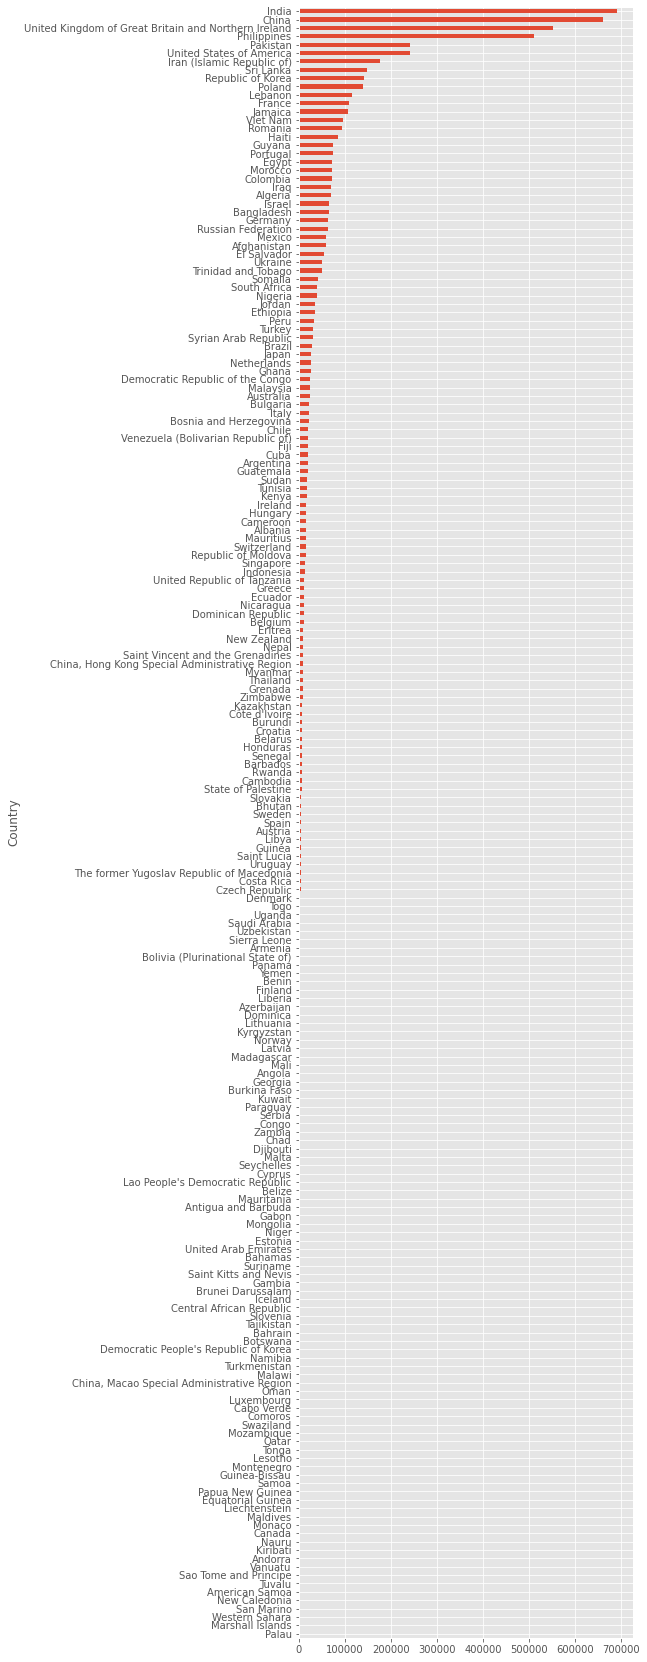

In [33]:
df['total'].plot(kind='barh',figsize=(6,30))
plt.show()